# Problem Description: Data Cleaning

In England, the police force has the ability to conduct a stop-and-search procedure on a civilian because they may suspect the civilian to be carrying illegal objects such as weapons or drugs. The conclusion of this procedure may be deemed the **'outcome'**, which can range from 'No Further Action' to 'Arrest' to a 'Penalty Notice for Disorder'. 

Suppose that we have been tasked to build a model to predict this **'outcome'** variable. From data.police.uk, I was able to collect data that can be used for this goal. There are multiple datasets because they are organised first by area (usually a county or city) and then by month. There are different datasets for London, Leicester, Durham and Merseyside, among other areas. In each area, there is one dataset per month. Additionally, these datasets are not complete; many of the features have missing data.

Our task is to merge and clean these datasets so that they are ready to be used for an ML model. I have collected the datasets for various locations and for the month of February in 2020. Let's begin by importing some necessary libraries

# Import libraries

In [1]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rc
style.use('fivethirtyeight')
import seaborn as sns

# Read first data set, belonging to London - February 2020

This will give us an initial idea of what the data looks like

In [2]:
data = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-city-of-london-stop-and-search.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 15 columns):
Type                                        236 non-null object
Date                                        236 non-null object
Part of a policing operation                0 non-null float64
Policing operation                          0 non-null float64
Latitude                                    192 non-null float64
Longitude                                   192 non-null float64
Gender                                      236 non-null object
Age range                                   222 non-null object
Self-defined ethnicity                      222 non-null object
Officer-defined ethnicity                   221 non-null object
Legislation                                 236 non-null object
Object of search                            233 non-null object
Outcome                                     236 non-null object
Outcome linked to object of search          236 non-null bool
R

Most of the columns are objects. The number of columns is small, so we probably don't need to decide which columns to use as features as we will likely end up using all of them

In [4]:
data.head(10)

#already, we can see some NaNs

Type                       Date  \
0  Person and Vehicle search  2020-02-01T02:19:25+00:00   
1              Person search  2020-02-01T02:30:37+00:00   
2              Person search  2020-02-01T03:52:46+00:00   
3              Person search  2020-02-01T04:40:48+00:00   
4              Person search  2020-02-01T05:32:48+00:00   
5              Person search  2020-02-01T08:51:24+00:00   
6              Person search  2020-02-01T09:31:00+00:00   
7              Person search  2020-02-01T09:32:04+00:00   
8  Person and Vehicle search  2020-02-01T09:35:32+00:00   
9  Person and Vehicle search  2020-02-01T09:41:56+00:00   

   Part of a policing operation  Policing operation   Latitude  Longitude  \
0                           NaN                 NaN  51.516006  -0.080573   
1                           NaN                 NaN  51.516006  -0.080573   
2                           NaN                 NaN  51.516814  -0.081620   
3                           NaN                 NaN  51.516814  -0.081620   
4                           NaN                 NaN  51.516814  -0.081620   
5                           NaN                 NaN  51.516814  -0.081620   
6                           NaN                 NaN  51.508066  -0.087780   
7                           NaN                 NaN  51.508066  -0.087780   
8                           NaN                 NaN  51.517680  -0.078484   
9                           NaN                 NaN  51.517680  -0.078484   

   Gender Age range                             Self-defined ethnicity  \
0  Female     25-34                    Other ethnic group - Not stated   
1    Male     25-34                    Other ethnic group - Not stated   
2    Male     25-34  White - English/Welsh/Scottish/Northern Irish/...   
3    Male     25-34  White - English/Welsh/Scottish/Northern Irish/...   
4    Male     25-34  White - English/Welsh/Scottish/Northern Irish/...   
5    Male     25-34  Mixed/Multiple ethnic groups - Any other Mixed...   
6    Male     18-24  White - English/Welsh/Scottish/Northern Irish/...   
7    Male     18-24  Mixed/Multiple ethnic groups - White and Black...   
8    Male     25-34                 White - Any other White background   
9    Male     25-34                 White - Any other White background   

  Officer-defined ethnicity  \
0                     Other   
1                     Black   
2                     White   
3                     White   
4                     White   
5                     Black   
6                     White   
7                     Black   
8                     White   
9                     White   

                                         Legislation  \
0              Misuse of Drugs Act 1971 (section 23)   
1              Misuse of Drugs Act 1971 (section 23)   
2  Police and Criminal Evidence Act 1984 (section 1)   
3  Police and Criminal Evidence Act 1984 (section 1)   
4  Police and Criminal Evidence Act 1984 (section 1)   
5  Police and Criminal Evidence Act 1984 (section 1)   
6  Police and Criminal Evidence Act 1984 (section 1)   
7  Police and Criminal Evidence Act 1984 (section 1)   
8              Misuse of Drugs Act 1971 (section 23)   
9              Misuse of Drugs Act 1971 (section 23)   

                     Object of search                       Outcome  \
0                    Controlled drugs  A no further action disposal   
1                    Controlled drugs     Summons / charged by post   
2                   Offensive weapons  A no further action disposal   
3                   Offensive weapons  A no further action disposal   
4                   Offensive weapons  A no further action disposal   
5                        Stolen goods  A no further action disposal   
6                        Stolen goods  A no further action disposal   
7                        Stolen goods  A no further action disposal   
8  Evidence of offences under the Act  A no further action disposal   
9  Evidence of offences under the Act  A n

# Load all datasets

In [5]:
#city of london

london_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-city-of-london-stop-and-search.csv')
london_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-city-of-london-stop-and-search.csv')
london_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-city-of-london-stop-and-search.csv')

#derbyshire
derbyshire_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-derbyshire-stop-and-search.csv')
derbyshire_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-derbyshire-stop-and-search.csv')
derbyshire_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-derbyshire-stop-and-search.csv')

#Durham
durham_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-durham-stop-and-search.csv')
durham_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-durham-stop-and-search.csv')
durham_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-durham-stop-and-search.csv')

#essex
essex_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-essex-stop-and-search.csv')
essex_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-essex-stop-and-search.csv')
essex_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-essex-stop-and-search.csv')

#leicestershire
leicester_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-leicestershire-stop-and-search.csv')
leicester_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-leicestershire-stop-and-search.csv')
leicester_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-leicestershire-stop-and-search.csv')

#merseyside
merseyside_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-merseyside-stop-and-search.csv')
merseyside_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-merseyside-stop-and-search.csv')
merseyside_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-merseyside-stop-and-search.csv')

#yorkshire
yorkshire_df_feb20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Feb 2020/2020-02-south-yorkshire-stop-and-search.csv')
yorkshire_df_jan20 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Jan 2020/2020-01-south-yorkshire-stop-and-search.csv')
yorkshire_df_dec19 = read_csv('/Users/alitaimurshabbir/Desktop/England Stop and Search Datasets/Dec 2019/2019-12-south-yorkshire-stop-and-search.csv')



df_list = [london_df_feb20, london_df_jan20, london_df_dec19, derbyshire_df_feb20,derbyshire_df_jan20,
           derbyshire_df_dec19,essex_df_feb20,essex_df_jan20,essex_df_dec19,leicester_df_feb20,leicester_df_jan20,
           leicester_df_dec19,merseyside_df_feb20,merseyside_df_jan20,merseyside_df_dec19,yorkshire_df_feb20,
           yorkshire_df_jan20,yorkshire_df_dec19]

# Merge into one dataframe

It is important to see what the other datasets look like because this will decide the method we use to merge the dataframes together. If we are lucky, all datasets should have the same columns. If so, we can simply concatenate along the rows (in other words, we can add one dataframe vertically to another) them using pandas. Pandas will then automatically match the column headings

In [6]:
derbyshire_df_feb20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 15 columns):
Type                                        119 non-null object
Date                                        119 non-null object
Part of a policing operation                0 non-null float64
Policing operation                          0 non-null float64
Latitude                                    118 non-null float64
Longitude                                   118 non-null float64
Gender                                      109 non-null object
Age range                                   110 non-null object
Self-defined ethnicity                      107 non-null object
Officer-defined ethnicity                   104 non-null object
Legislation                                 119 non-null object
Object of search                            119 non-null object
Outcome                                     112 non-null object
Outcome linked to object of search          119 non-null bool
R

This has the same columns as london_df_feb2020. Great, we can concatenate the dataframes easily using **pd.concat()**

In [7]:
merged_df = pd.concat(df_list, axis = 0)
print(len(merged_df))

22146


As each row represents a single stop-and-search indicent, there is a total of 22146 stop-and-search incidents in our dataset. It is a good idea to check what percentage of the total data is missing.

In [8]:
missing_cells = merged_df.isnull().sum().sum()
total_cells = np.product(merged_df.shape)
pct_data_missing = ((missing_cells/total_cells)*100)
print('% of missing data is', pct_data_missing)

% of missing data is 21.09666154911346


A fifth of our data is missing, which is neither ideal nor catastrophic. It actually may be in the right range for us to be able to effectively apply the data cleaning techniques available to us.

A quick visualisation of missing data may be useful, because it can inform us if the 'missingness' is systemic or random:

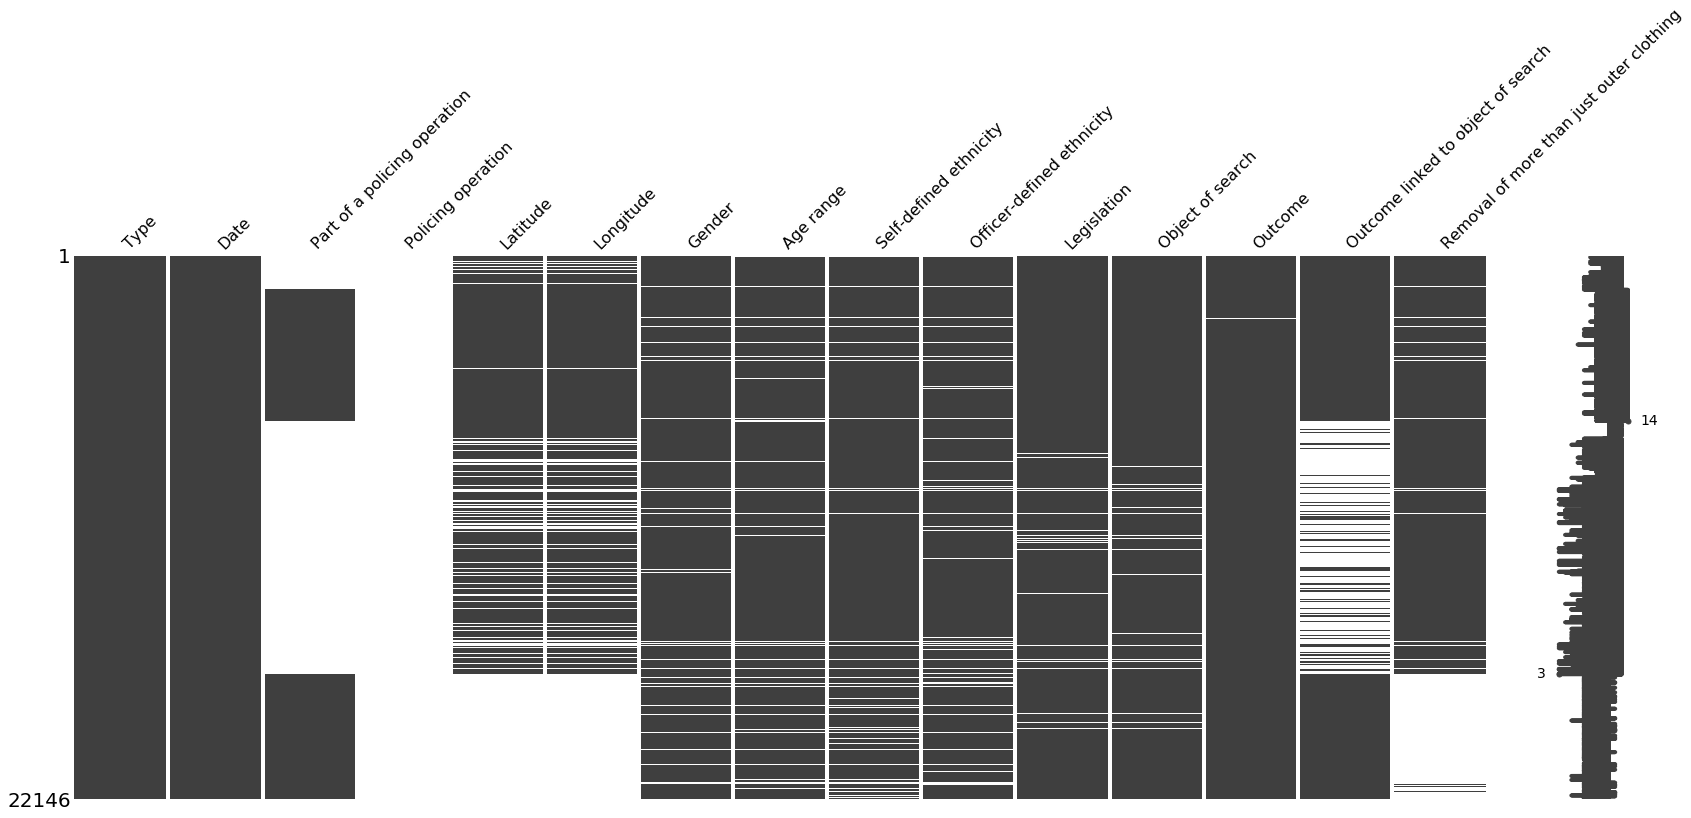

In [9]:
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(merged_df)

To take a more specific look, let's find out the percentage of missing data by column:

In [10]:
null_sum = merged_df.isnull().sum() #boolean values of True (missing) and False (not missing)
null_sum.sort_values()
percent_missing = (((null_sum/len(merged_df.index))*100).round(2))#divide number of True values by index number of dataframe

summaryMissing = pd.concat([null_sum, percent_missing], axis = 1, keys = ['Absolute Number Missing', '% Missing']) 
summaryMissing.sort_values(by=['% Missing'], ascending=False) #sort descending by '% Missing' column

Absolute Number Missing  % Missing
Policing operation                                          22146     100.00
Part of a policing operation                                11717      52.91
Outcome linked to object of search                           8244      37.23
Latitude                                                     7383      33.34
Longitude                                                    7383      33.34
Removal of more than just outer clothing                     5557      25.09
Officer-defined ethnicity                                    1795       8.11
Age range                                                    1747       7.89
Self-defined ethnicity                                       1607       7.26
Gender                                                       1368       6.18
Legislation                                                   517       2.33
Object of search                                              511       2.31
Outcome                                                       106       0.48
Type                                                            0       0.00
Date                                                            0       0.00

Straight away we can see that the **'Policing Operation'** feature has no entries whatsoever, so we can drop this entire column. Additionally, **'Part of a policing operation'** is missing data for over half of the number of rows. What can we do about this?

There are two approaches we can take. Either we can drop the entire feature, as we are doing with **'Policing Operation'**, or we can drop only those rows from the entire dataframe that have missing values for **'Part of a policing operation'**.

This latter idea may have some credibility if we think that **'Part of a policing operation'** could be a vital feature in predicting the **'Outcome'** variable. But I don't believe this is the case. Additionally, a major downside of this approach is that we would lose a great deal of useful data for other features, as we would be dropping entire rows.

It makes sense, then, to drop both **'Policing Operation'** and **'Part of a policing operation'**

In [11]:
merged_df.drop(['Policing operation','Part of a policing operation'], axis=1,inplace = True)

Let's quickly repeat our previous step of finding the % of missing data by feature to check if we have dropped the features correctly.

In [12]:
null_sum = merged_df.isnull().sum() #boolean values of True (missing) and False (not missing)
null_sum.sort_values()
percent_missing = (((null_sum/len(merged_df.index))*100).round(2))#divide number of True values by index number of dataframe

summaryMissing = pd.concat([null_sum, percent_missing], axis = 1, keys = ['Absolute Number Missing', '% Missing']) 
summaryMissing.sort_values(by=['% Missing'], ascending=False) #sort descending by '% Missing' column


#features are dropped correctly

Absolute Number Missing  % Missing
Outcome linked to object of search                           8244      37.23
Latitude                                                     7383      33.34
Longitude                                                    7383      33.34
Removal of more than just outer clothing                     5557      25.09
Officer-defined ethnicity                                    1795       8.11
Age range                                                    1747       7.89
Self-defined ethnicity                                       1607       7.26
Gender                                                       1368       6.18
Legislation                                                   517       2.33
Object of search                                              511       2.31
Outcome                                                       106       0.48
Type                                                            0       0.00
Date                                                            0       0.00

<font color=green>

### 'Latitude' & 'Longtitude' variables

</font>

We can start with the Latitude and Longitude variables. Combined, they illustrate the location of the stop and search incidents, which we know should correspond to different counties in England. 

I will visualise these values over a map of England to find whether or not these features have outliers. Huge thanks to [Ahmed Qassim's excellent article on Medium](https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db) for showing me how to do the following visualisation

In [13]:
#decide the coordinates of the map to be displayed using the minimum and maximum longtitude/latitude in dataset

BBox = ((merged_df.Longitude.min(), merged_df.Longitude.max(),      
         merged_df.Latitude.min(), merged_df.Latitude.max()))

print(BBox)

(-7.98653, 1.29534, 50.134603000000006, 54.951631000000006)


Use the coordinates above to save an image of a subsection of the world map using [Open Street Map]('www.openstreetmap.org/'), then load this image:

In [14]:
plt.rcParams['figure.dpi'] = 300
image = plt.imread('/Users/alitaimurshabbir/Desktop/mapA.png')

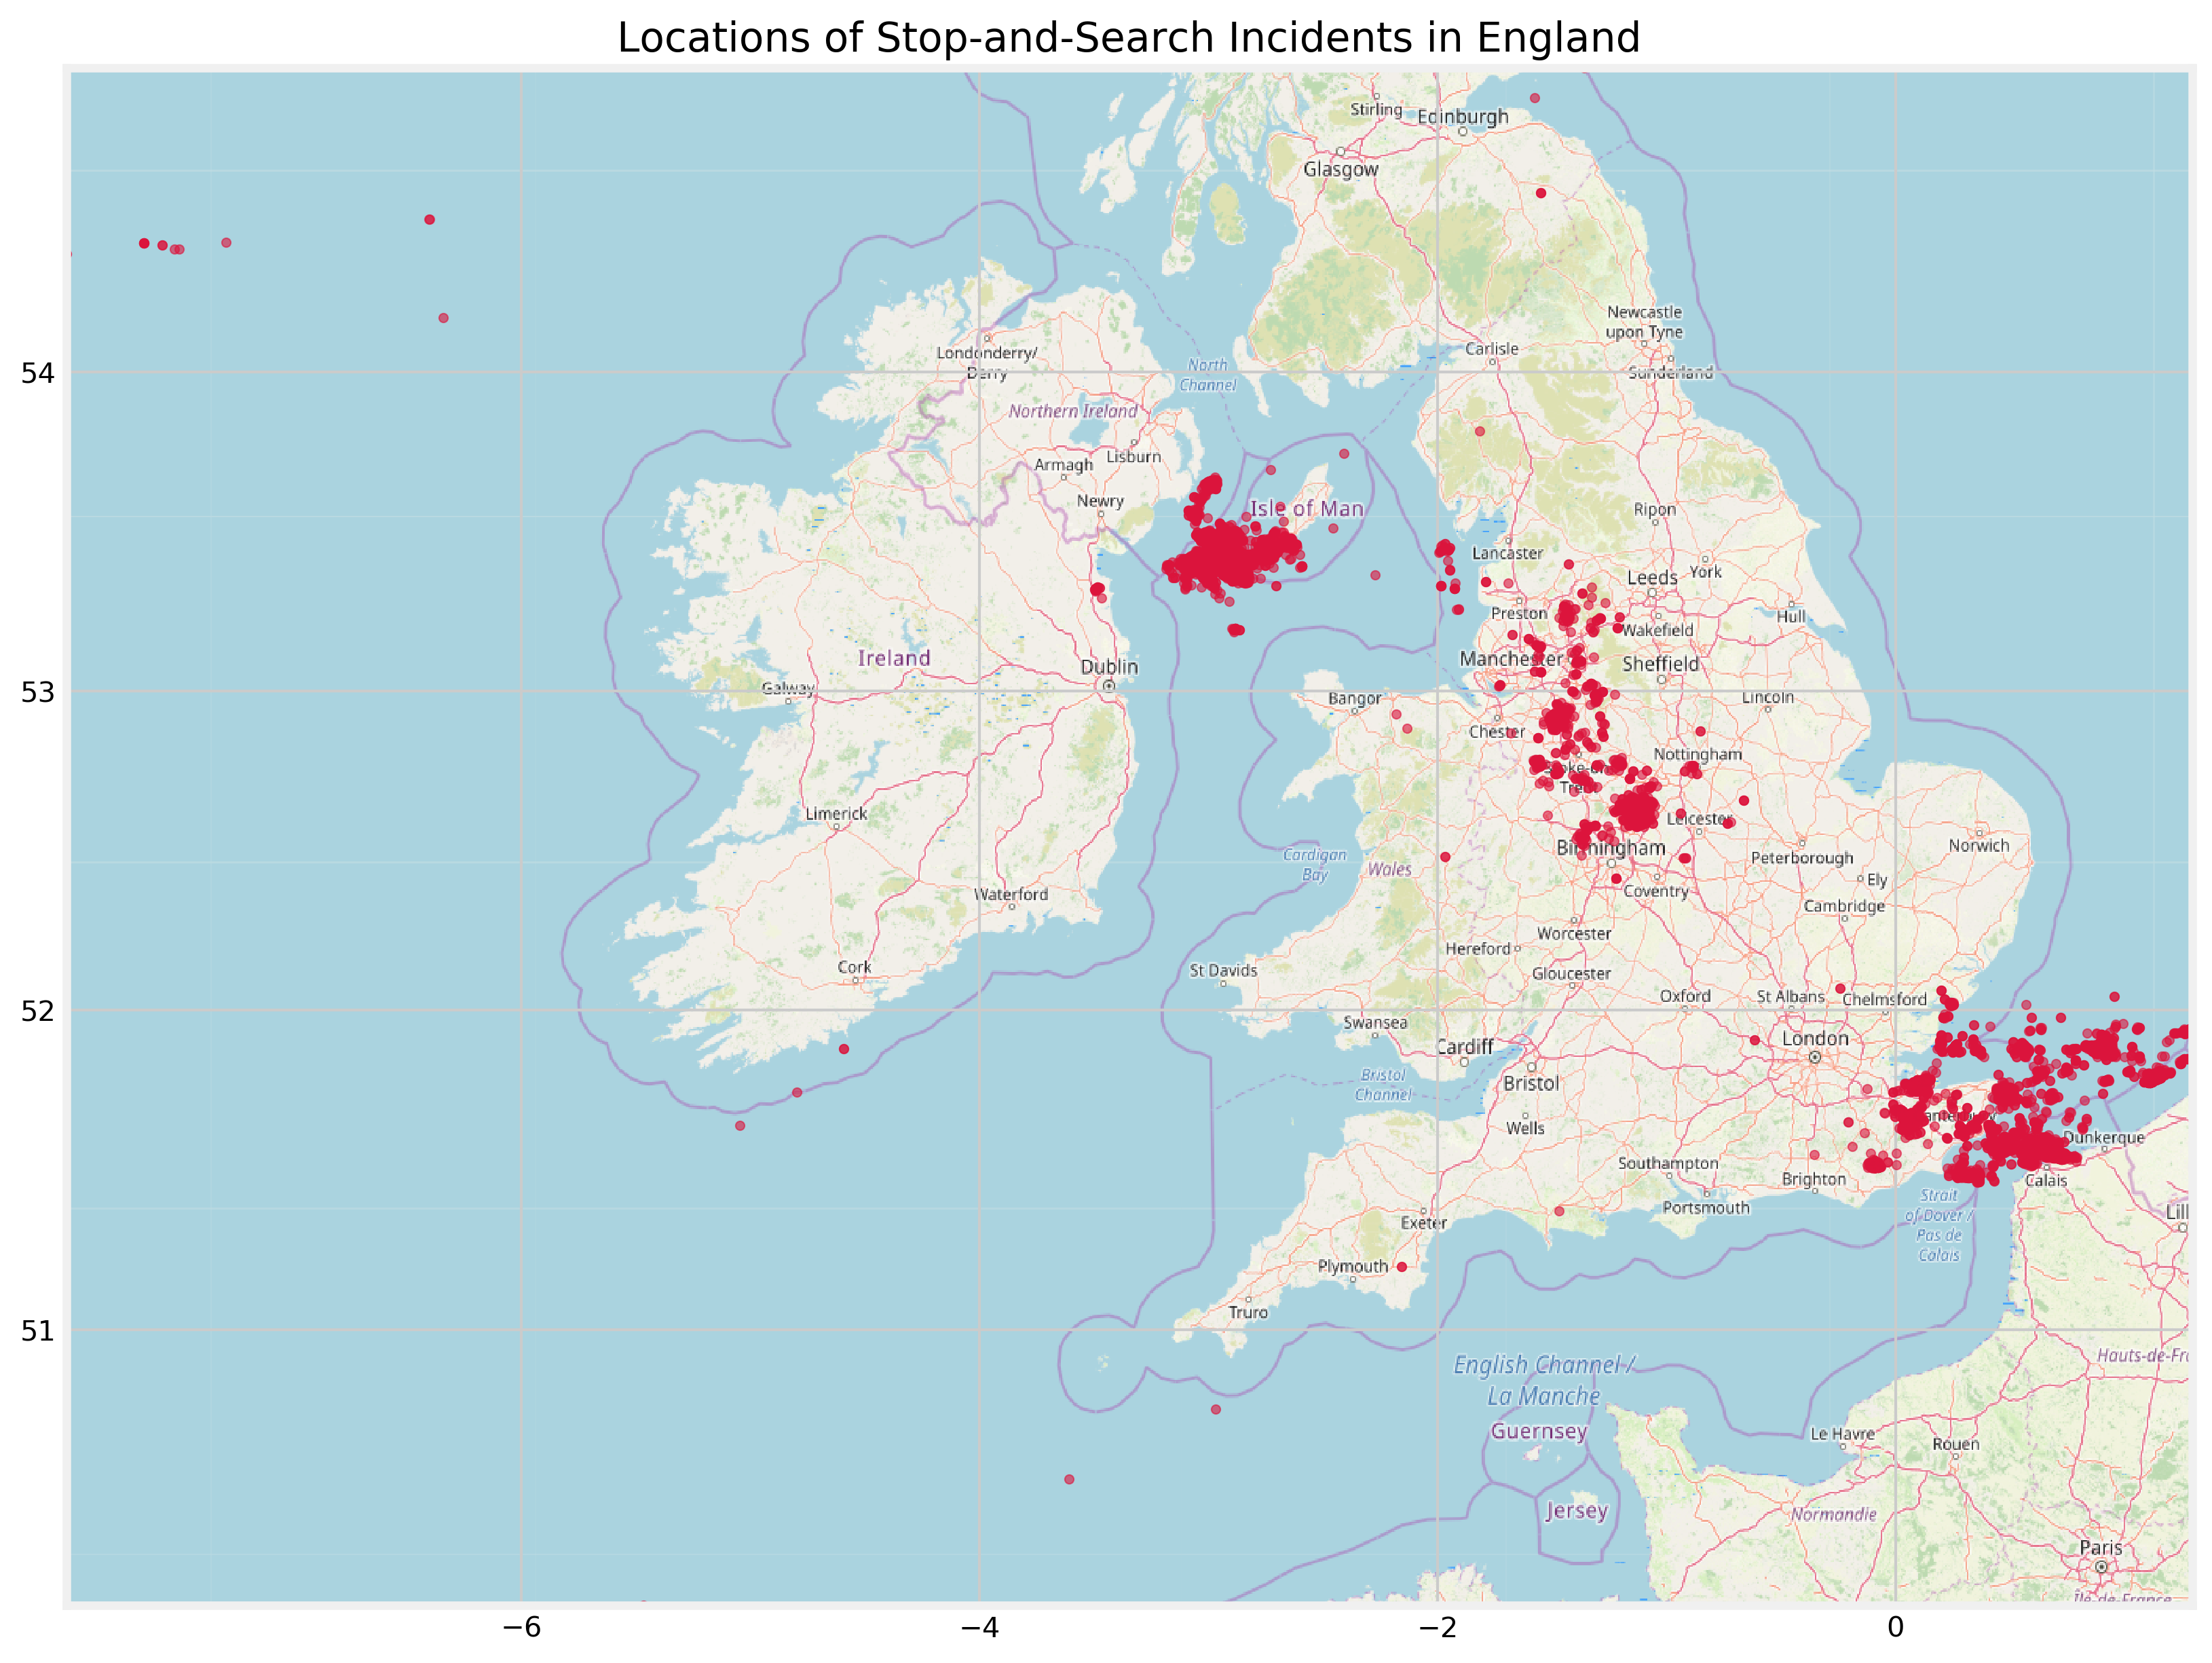

In [15]:
#display the image and scatter plot datapoints of latitude/longitude over it

fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(merged_df.Longitude, merged_df.Latitude, zorder=1, alpha= 0.6, c='crimson', s=10)
ax.set_title('Locations of Stop-and-Search Incidents in England')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(image, zorder=0, extent = BBox, aspect= 'auto')

Ah, clearly we have quite a lot of problems.

There is a colossal cluster of datapoints in the English Channel, in addition to sporadic datapoints present off the south coast of Cornwall and Ireland. Moreover, there are too many datapoints west of the landmass egde of the Isle of Man. None of these placements makes sense.

There are two things that make me believe the visualisation above is incorrect:

1. The website I used to get the map, Open Street Map, is optimised for street maps, as the name implies
2. The source of the data is a state institution and it is unlikely that its data recording process was as erroneous as the plot implies

To test this out, I will plot Longitude and Latitude on a map of slightly different dimensions. Since the values of those features are fixed, the positioning of the datapoints should be the same as in the plot above:

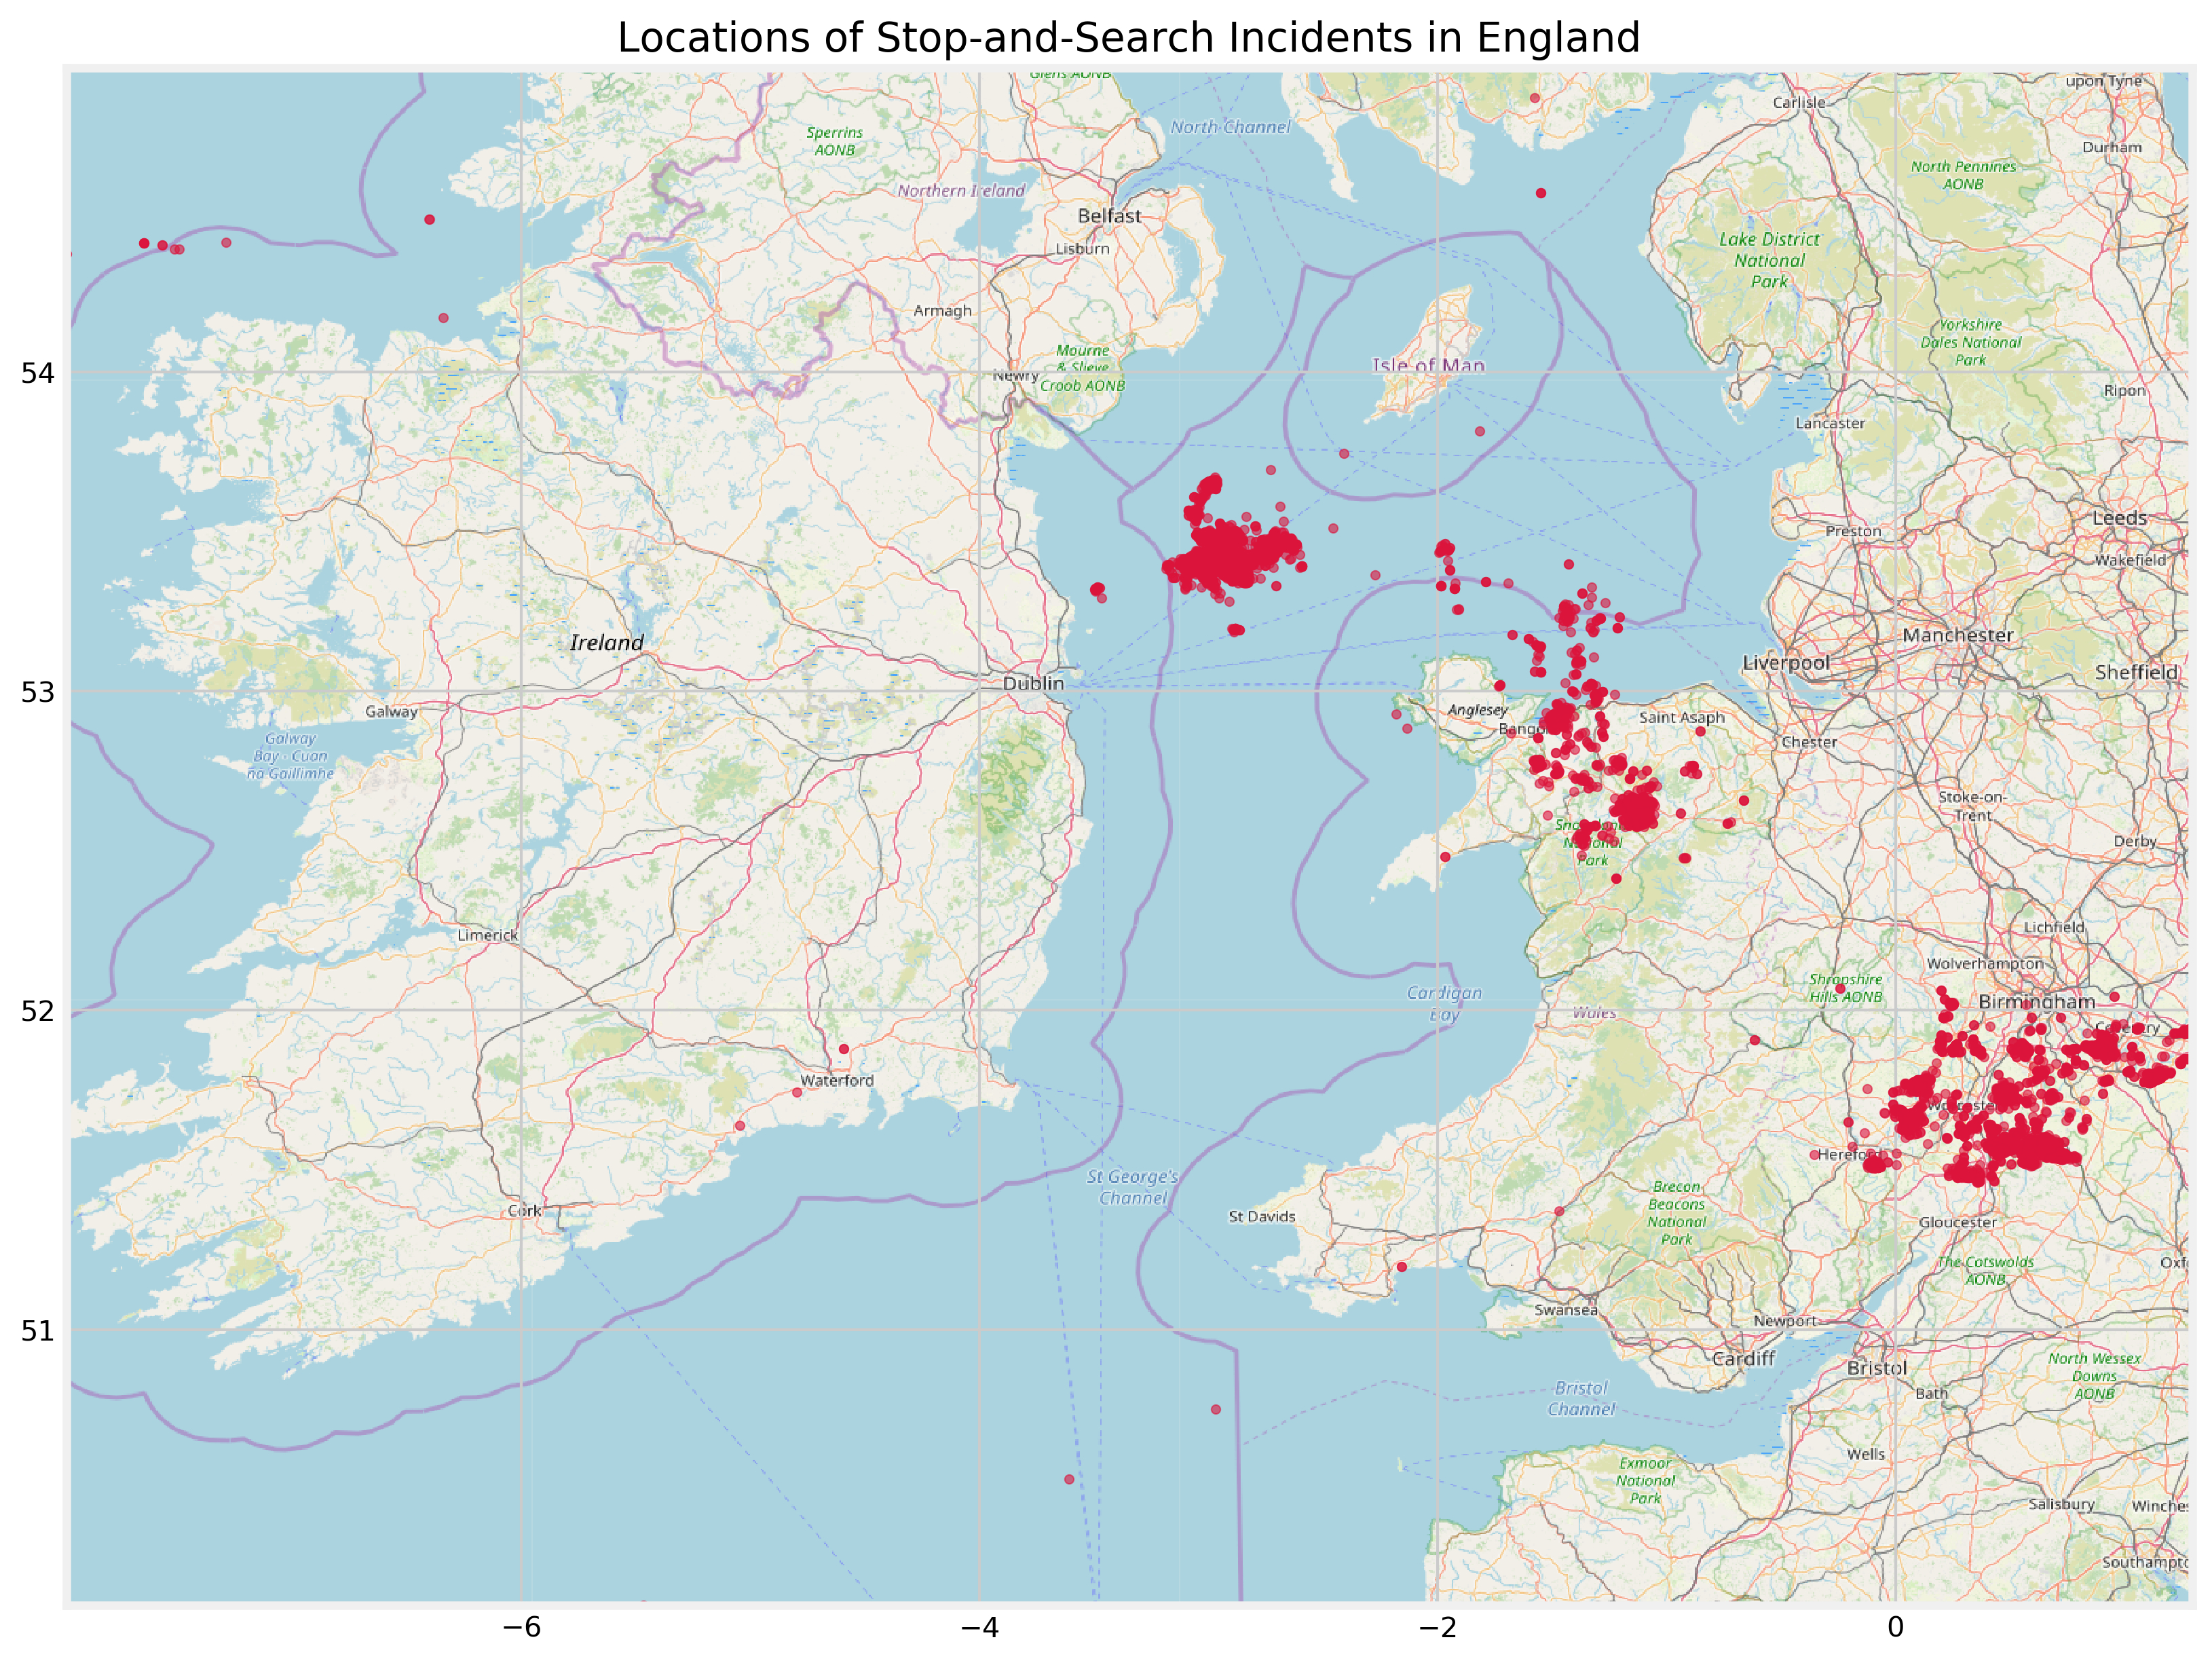

In [16]:
image = plt.imread('/Users/alitaimurshabbir/Desktop/map1.png')


fig, ax = plt.subplots(figsize = (12,10))
ax.scatter(merged_df.Longitude, merged_df.Latitude, zorder=1, alpha= 0.6, c='crimson', s=10)
ax.set_title('Locations of Stop-and-Search Incidents in England')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(image, zorder=0, extent = BBox, aspect= 'auto')

As I thought, there is an error in the plotting process and I am unable to find the source of this.

I cannot rely on this to find outliers, so I will have to use other, more traditional methods. One such way is to use a combination of boxplots and geographical (coordinate) data:

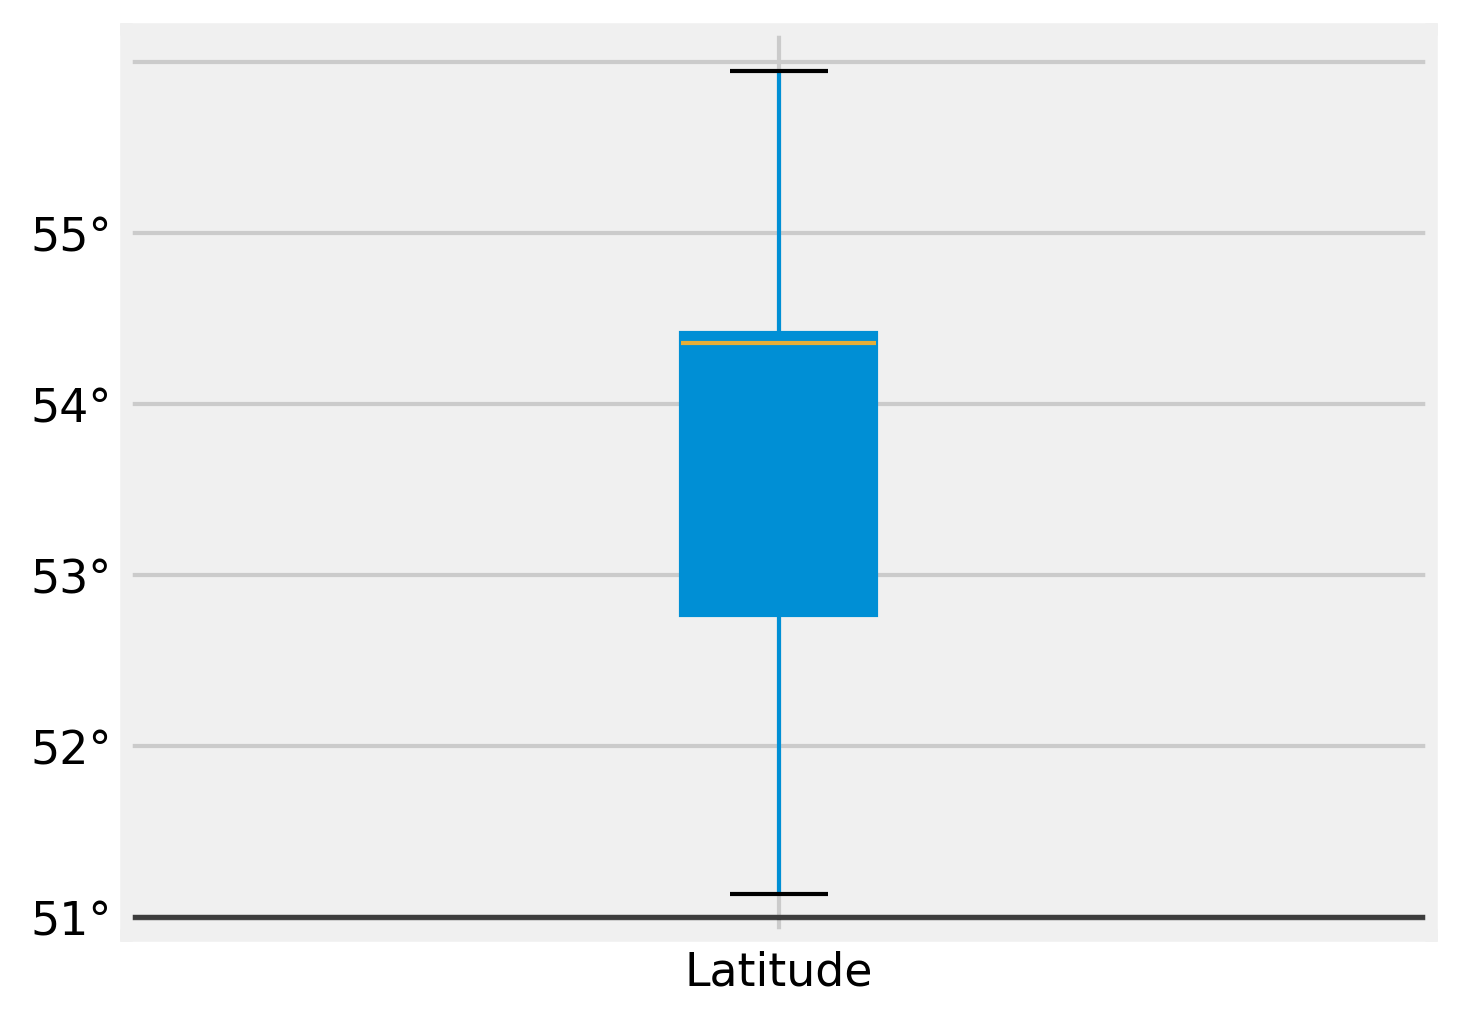

In [17]:
plt.figure(figsize=(5,4))

lat_box = merged_df.boxplot(column = ['Latitude'], patch_artist = True)
lat_box.tick_params(axis = 'both', which = 'major', labelsize = 11)
lat_box.set_yticklabels(labels = ['50°','51°','52°','53°','54°','55°'])
lat_box.axhline(y = 50, color = 'black', linewidth = 1.3, alpha = .7)

Let's confirm whether there are outliers outside of our accepted geographic bounds using geographical data

Here are the extreme Latitude points for England (mainland) using [Wikipedia](https://en.wikipedia.org/wiki/List_of_extreme_points_of_England)

- Northernmost point – Marshall Meadows Bay, Northumberland at 55°48′N 2°02′W
- Northernmost settlement – Marshall Meadows, Northumberland at 55°48′N 2°02′W
- Southernmost point – Lizard Point, Cornwall at 49°57′N 5°12′W
- Southernmost settlement – Lizard, Cornwall at 49°57′N 5°12′W

As a result, I'm going to drop all entries outside of these bounds. Earlier, I stated my strong opposition to dropping observations. 

But I believe Latitude and Longitude could be powerful predictors of our target variable. Not using them as features at all or using them as features with observations that imply stop and search incidents are happening in bodies of water are both less desirable options. 

Finally, for variables with outliers, we can typically replace the missing values with the median because the median is insensitive to outliers. But in this case, it will mean assigning a single location to a large number of incidents (7,383 observations to be exact, as we'll see shortly). Again, this does not make much sense.

In [18]:
#drop observations outside of extreme coordinate points
updated_merged_df = merged_df[(merged_df['Latitude']<=55.5) | (merged_df['Latitude']>=49)]

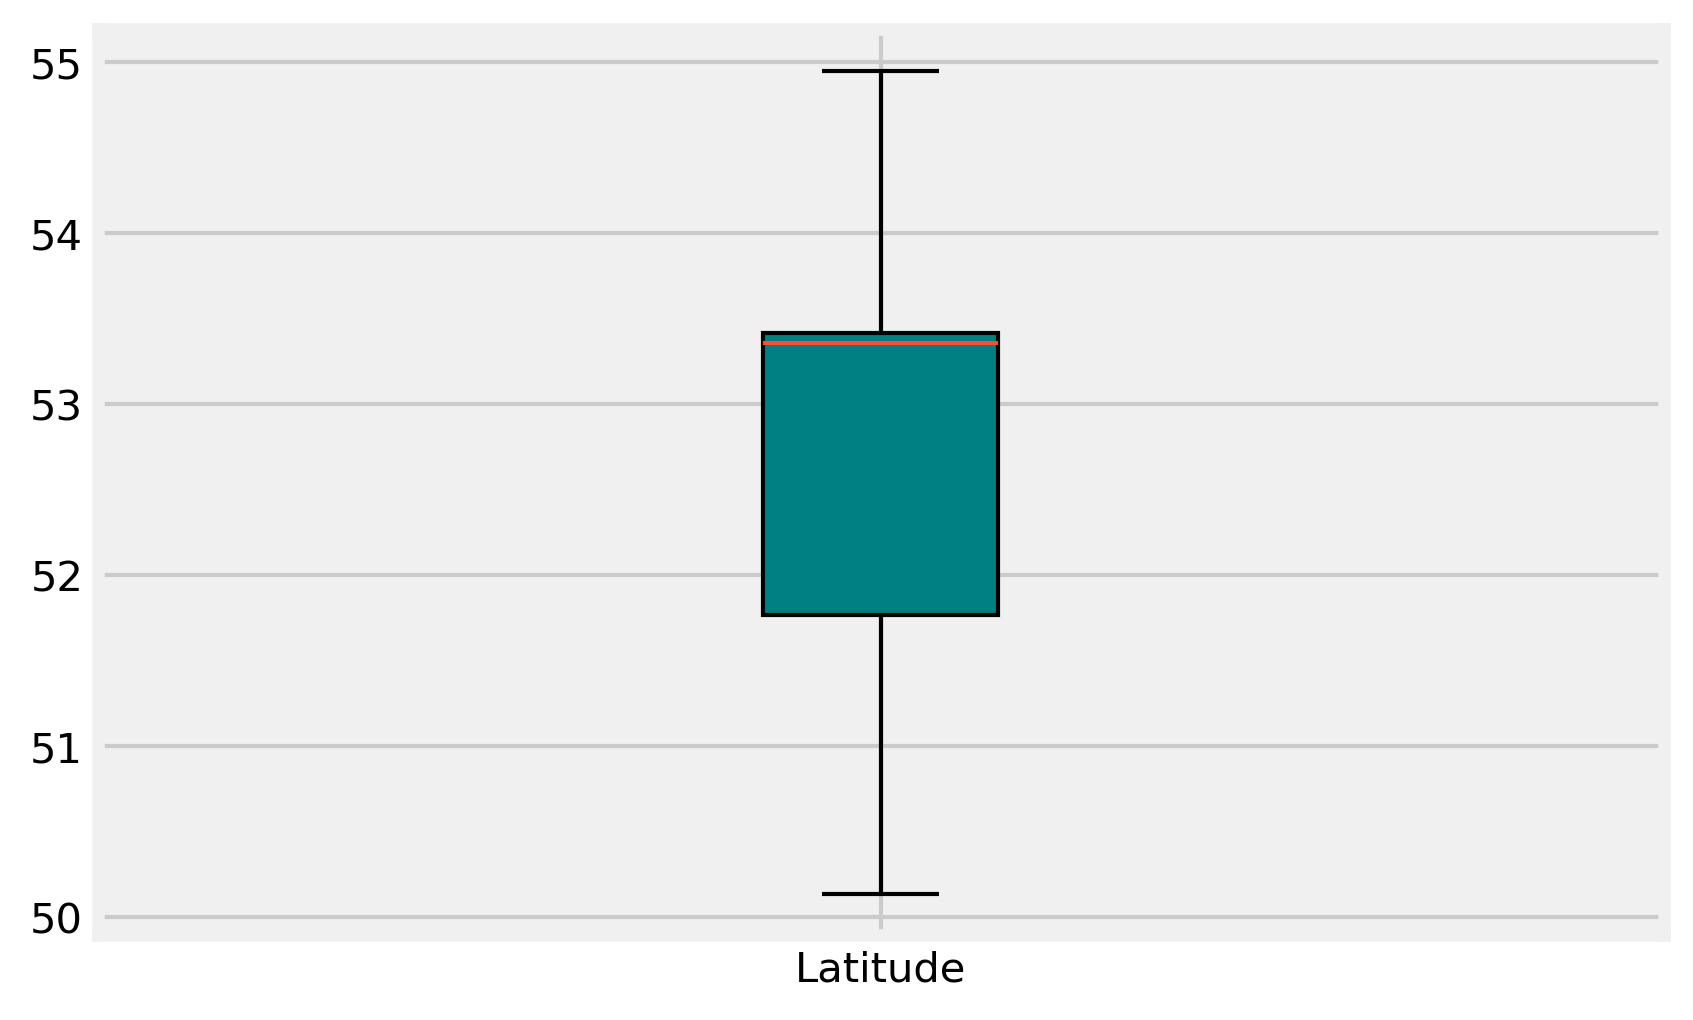

In [19]:
#visualising the change

boxplot_lat = plt.boxplot(updated_merged_df['Latitude'],patch_artist=True, labels = ['Latitude'])

colors = ['teal']
for patch, color in zip(boxplot_lat['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

And for Longitude:

- Westernmost point – Land's End, Cornwall at 50°04′N 5°43′W
- Westernmost settlement – Sennen Cove, Cornwall at 50°04′N 5°42′W
- Easternmost point – Lowestoft Ness, Suffolk at 52°29′N 1°46′E
- Easternmost settlement – Lowestoft, Suffolk at 52°28′N 1°45′E

In [20]:
updated_merged_df = updated_merged_df[(updated_merged_df['Longitude']<=5.5) | (updated_merged_df['Longitude']>=1)]

In [21]:
print(len(merged_df))
print(len(updated_merged_df))
print('Percentage of original data remaining:', (len(updated_merged_df)/len(merged_df)*100), '%')

22146
14763
Percentage of original data remaining: 66.6621511785424 %


So we lost a third of the data, approximately. This would be a bigger issue if the number of remaining observations was not so large; 14,000+ observations is plenty of data for a robust model

<font color=green>
    
### 'Outcome linked to object of search' variable
</font>

Now we can get to think about the **'Outcome linked to object of search'** variable.

Understanding this is a little tricky. It is telling us whether or not the object found on the civilian searched, captured in the **'Object of search'** variable, was the primary factor in determining the value of the **'Outcome'** variable.

Let's take two rows to illsutrate this point.

In [22]:
updated_merged_df.iloc[3:5,:]

Type                       Date   Latitude  Longitude Gender  \
3  Person search  2020-02-01T04:40:48+00:00  51.516814   -0.08162   Male   
4  Person search  2020-02-01T05:32:48+00:00  51.516814   -0.08162   Male   

  Age range                             Self-defined ethnicity  \
3     25-34  White - English/Welsh/Scottish/Northern Irish/...   
4     25-34  White - English/Welsh/Scottish/Northern Irish/...   

  Officer-defined ethnicity  \
3                     White   
4                     White   

                                         Legislation   Object of search  \
3  Police and Criminal Evidence Act 1984 (section 1)  Offensive weapons   
4  Police and Criminal Evidence Act 1984 (section 1)  Offensive weapons   

                        Outcome Outcome linked to object of search  \
3  A no further action disposal                              False   
4  A no further action disposal                               True   

  Removal of more than just outer clothing  
3                                    False  
4                                    False

Here we see 2 similar cases with one important distinction. Both individuals were searched for **'Offensive weapons'** and both searches yielded the outcome of 'A no further action disposal'. 

However, the first row has the value of 'False' in the column **'Outcome linked to object of search'** while the second has the value of 'True'. 

This seems to be indicating to us that, for the first individual, the 'Offensive weapon' was not the primary determinant of the outcome. In other words, the presence (the weapon was actually found) or absence (there was no weapon to be found) of the weapon was not responsible for the officer's decision of taking no further action. 

For the second individual, the opposite seems to be correct; the presence or absence of the weapon was responsible for the decision taken. 

I admit that this took a while to reason about in my head and it still doesn't make more sense without more context, which unfortunately isn't available in the dataset. Is it the case that the **Outcome linked to object of search** variable is actually indicating whether or not the **Object of search** was found? If so, Individual #1 had no further action taken against them because no weapon was found. Individual #2, conversely, had no further action taken against them *because* a weapon being found. There was something unique to the circumstances of the incident or of the weapon that the officer decided that a more 'serious' outcome was not necessary.

---------------------------------------------------------------------------------------------------------------------

We will leave this line of reasoning for now as the focus again is on dataset preparation and cleaning. Instead, we can focus on dealing with the missing values in the **Outcome linked to object of search** feature. Using the following code, we see that it has 6608 missing values

I don't like the idea of dropping all these rows because we've done this once before and I don't want to lose more data. Instead, we can fill these values in with the Imputer class or using the fill forward/backward methods. 

Imputer allows us to fill the missing values of a feature using a summary statistic of the feature, such as the mean or the median. Fill forward fills a NaN with the same value as the previous non-NaN value. Fill backward does the same but with the subsequent non-NaN value.

I want to take a look at the distribution of values in the **Outcome linked to object of search** feature before deciding which method to pursue

In [23]:
updated_merged_df['Outcome linked to object of search'].value_counts() 

False    4729
True     3426
Name: Outcome linked to object of search, dtype: int64

In [24]:
updated_merged_df['Outcome linked to object of search'].isnull().sum() #missing values

6608

57.9% of the values equate to 'False'. If I use a summary statistic as a value filler, it will heavily distort the dataset in one direction or the other because there are only 2 available values. For example, the mode value is 'False'. If I fill the missing 6608 values with 'False', there will be a strong imbalance in the values that is most likely not going to be representative of reality. 

Of course, any method of filling missing values is going to branch out from ground reality to some extent. Does using the fill forward method get us around this problem?

In [25]:
updated_merged_df['Outcome linked to object of search'].fillna(method='ffill', inplace = True)

In [26]:
#find out the distribution of values after filling in values
updated_merged_df['Outcome linked to object of search'].value_counts()

True     8934
False    5829
Name: Outcome linked to object of search, dtype: int64

In [27]:
#double-check number of missing values
updated_merged_df['Outcome linked to object of search'].isnull().sum()

0

Interestingly, the distribution of True and False values has changed considerably, with the 'False' class going from 58% to 40% of the dataset

I am not really comfortable with this outcome because I am questionning whether this feature may lose some predictive power as a result of the big deviation from the distribution of the existing data points in the feature. The alternative is to drop the missing values, so I will stick to this method for now.

<font color=green>


### 'Removal of more than just outer clothing' variable

</font>

We replicate the same analysis for a similar feature in terms of values, **Removal of more than just outer clothing**:

In [28]:
updated_merged_df['Removal of more than just outer clothing'].value_counts() #distribution of values

False    13965
True       353
Name: Removal of more than just outer clothing, dtype: int64

Let's try the forward fill method as before:

In [29]:
updated_merged_df['Removal of more than just outer clothing'].fillna(method='ffill', inplace = True)

#find out the distribution of values after filling in values
updated_merged_df['Removal of more than just outer clothing'].value_counts()

False    14404
True       359
Name: Removal of more than just outer clothing, dtype: int64

I am happy with this. The distribution is kept largely the same

In [30]:
#double-checking missing values for 'Removal of more than just outer clothing' feature
updated_merged_df['Removal of more than just outer clothing'].isnull().sum()

0

<font color=green>

### Age range variable

</font>

For **Age range**, I need to check the data type first because this will influence how I deal with the missing data

In [31]:
updated_merged_df.dtypes['Age range']

dtype('O')

This feature has an object data type. Since it is a range, it makes sense to convert the feature into a string, then replace the missing values with the most common value (mode) of the feature.

In [32]:
updated_merged_df['Age range'] = updated_merged_df['Age range'].astype(str) #convert to string

In [33]:
updated_merged_df['Age range'].value_counts() #find most common value

18-24       5169
25-34       3232
10-17       2912
over 34     2752
nan          696
under 10       2
Name: Age range, dtype: int64

In [34]:
#where Age range has a value of 'nan', replace it with '18-24'. Otherwise, return the original value of 'Age range'

updated_merged_df['Age range'] = np.where(updated_merged_df['Age range'] == 'nan', '18-24',
                                          updated_merged_df['Age range'])

In [35]:
updated_merged_df['Age range'].value_counts()

18-24       5865
25-34       3232
10-17       2912
over 34     2752
under 10       2
Name: Age range, dtype: int64

Great. Let's get a refresher on where we are in terms of missing data percentages by feature:

In [36]:
null_sum = updated_merged_df.isnull().sum() #boolean values of True (missing) and False (not missing)
null_sum.sort_values()
percent_missing = (((null_sum/len(updated_merged_df.index))*100).round(2))

#divide number of True values by index number of dataframe
summaryMissing = pd.concat([null_sum, percent_missing], axis = 1, keys = ['Absolute Number Missing', '% Missing']) 
summaryMissing.sort_values(by=['% Missing'], ascending=False) #sort descending by '% Missing' column

Absolute Number Missing  % Missing
Officer-defined ethnicity                                     788       5.34
Gender                                                        524       3.55
Self-defined ethnicity                                        500       3.39
Object of search                                              317       2.15
Legislation                                                   314       2.13
Outcome                                                        98       0.66
Type                                                            0       0.00
Date                                                            0       0.00
Latitude                                                        0       0.00
Longitude                                                       0       0.00
Age range                                                       0       0.00
Outcome linked to object of search                              0       0.00
Removal of more than just outer clothing                        0       0.00

<font color=green>

### 'Gender' variable

</font>

Luckily all the variables we have to deal with now have very small amounts of missing data. So we can clean them very quickly using either ffill or bfill or dropping observations, based on the variable itself. 

We'll use backfill here for Gender:

In [37]:
print(updated_merged_df['Gender'].value_counts())
updated_merged_df['Gender'].fillna(method='bfill', inplace = True) #use backfill to replace NaNs
print('------------------------------------------')
print(updated_merged_df['Gender'].value_counts())

Male      13027
Female     1212
Name: Gender, dtype: int64
------------------------------------------
Male      13510
Female     1253
Name: Gender, dtype: int64


<font color=green>


### 'Object of search' variable

</font>

In [38]:
print('Value counts before filling missing values:')
print('-------------------------------------------')
updated_merged_df['Object of search'].value_counts()

Value counts before filling missing values:
-------------------------------------------


Controlled drugs                              10725
Offensive weapons                              1184
Article for use in theft                       1107
Stolen goods                                    648
Anything to threaten or harm anyone             365
Evidence of offences under the Act              239
Articles for use in criminal damage             122
Firearms                                         52
Psychoactive substances                           2
Fireworks                                         1
Goods on which duty has not been paid etc.        1
Name: Object of search, dtype: int64

In [39]:
print('Missing values:', updated_merged_df['Object of search'].isnull().sum())
print('-------------------------------------------')
print('Value counts after filling missing values:')
print('-------------------------------------------')
updated_merged_df['Object of search'].fillna(method='bfill', inplace = True)
updated_merged_df['Object of search'].value_counts()

Missing values: 317
-------------------------------------------
Value counts after filling missing values:
-------------------------------------------


Controlled drugs                              10975
Offensive weapons                              1209
Article for use in theft                       1128
Stolen goods                                    660
Anything to threaten or harm anyone             365
Evidence of offences under the Act              246
Articles for use in criminal damage             123
Firearms                                         53
Psychoactive substances                           2
Fireworks                                         1
Goods on which duty has not been paid etc.        1
Name: Object of search, dtype: int64

<font color=green>


### 'Outcome' variable

</font>

Since 'Outcome' is our target variable, and since there's only a small number of observations missing, I'm going to drop all observations which are NaNs

In [40]:
print('Number of Missing Values:', updated_merged_df['Outcome'].isnull().sum()) #find number of missing values

updated_merged_df.dropna(subset=['Outcome'], inplace = True) #drop observation if there is a NaN in 'Outcome' column

Number of Missing Values: 98


<font color=green>


### 'Legislation' variable

</font>

As seen below, Legislation refers to very specific laws under which the stop and search is undertaken and the 'Outcome' value is decided. It wouldn't make sense to assign one of these values to incidents with missing Legislation entries because they are so specific. And since the number of missing observations is very low, I'm going to drop these observations also

In [41]:
print(updated_merged_df['Legislation'].value_counts())
updated_merged_df.dropna(subset=['Legislation'], inplace = True)

Misuse of Drugs Act 1971 (section 23)                      10627
Police and Criminal Evidence Act 1984 (section 1)           3309
Criminal Justice and Public Order Act 1994 (section 60)      367
Firearms Act 1968 (section 47)                                32
Poaching Prevention Act 1862 (section 2)                       9
Aviation Security Act 1982 (section 27(1))                     2
Psychoactive Substances Act 2016 (s36(2))                      2
Wildlife and Countryside Act 1981 (section 19)                 2
Deer Act 1991 (section 12)                                     1
Name: Legislation, dtype: int64


# Final look at a summary of missing values

In [42]:
null_sum = updated_merged_df.isnull().sum() #boolean values of True (missing) and False (not missing)
null_sum.sort_values()
percent_missing = (((null_sum/len(updated_merged_df.index))*100).round(2))

#divide number of True values by index number of dataframe
summaryMissing = pd.concat([null_sum, percent_missing], axis = 1, keys = ['Absolute Number Missing', '% Missing']) 
summaryMissing.sort_values(by=['% Missing'], ascending=False) #sort descending by '% Missing' column

Absolute Number Missing  % Missing
Officer-defined ethnicity                                     682       4.75
Self-defined ethnicity                                        406       2.83
Type                                                            0       0.00
Date                                                            0       0.00
Latitude                                                        0       0.00
Longitude                                                       0       0.00
Gender                                                          0       0.00
Age range                                                       0       0.00
Legislation                                                     0       0.00
Object of search                                                0       0.00
Outcome                                                         0       0.00
Outcome linked to object of search                              0       0.00
Removal of more than just outer clothing                        0       0.00

And that's it, we're done! Data cleaning is an underrated part of data science projects and it could have a significant influence on the performance of your final model. Thank you for reading through my project. Hopefully you learned something useful, either something new or a faster/different way to do something you already knew how to do. 